###  Code for Mountain Car 

The `MountainCar` class is based on the problem description given in [Example 8.2](http://www.incompleteideas.net/book/ebook/node89.html) of Sutton & Barto (1998) The following cells in this section will walk you through the basic usage of this class.

In [1]:
import numpy as np
import mountaincar
import matplotlib.pyplot as plt

np.random.seed(7)

env = mountaincar.MountainCar()
env.reset()
print("Starting position of the car", env.position)
print("Starting velocity of the car", env.velocity)
if not env.game_over:
    print("Game is not over yet.")

Starting position of the car -0.454704306550481
Starting velocity of the car 0.03128512489633177
Game is not over yet.


In [2]:
env.reset()
print(env.position)
print(env.velocity)

0.46258217039422456
0.005389421857460719


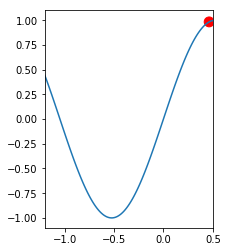

In [3]:
env.plot()

The `MountainCar` environment can be interacted by using the `make_step()` method. This method takes an `action` as input and computes the response of the environment. This method returns a `reward` signal, which is always -1.

The action can be one of the following integers:
* -1: full throttle reverse
*  0: zero throttle
*  1: full throttle forward

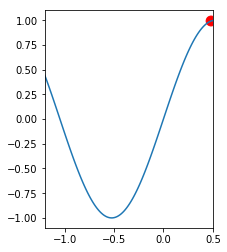

In [4]:
# Let's drive a bit full throttle forward and plot again.
env.make_step(action=1)
env.make_step(action=1)
env.make_step(action=1)
env.plot()

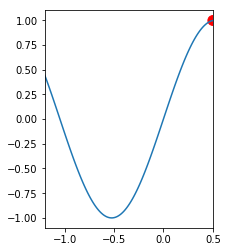

In [5]:
num_steps = 3
for episode in range(num_steps):
    # Always action 1 (full throttle forward)
    env.make_step(action=1)
    env.plot()

# gradient-descent Sarsa

The pseudo-code for gradient-descent Sarsa($\lambda$) is reproduced below from the textbook (Reinforcement Learning, Sutton & Barto, 1998, [Section 8.4](http://www.incompleteideas.net/book/ebook/node89.html#fig:FAsarsa).
<img src="images/gradient_descent_Sarsa.png" style="width: 500px;"/>

The following code is to produce a learning curve for a _single_ agent. This shoud be a dynamic figure that we can produce from scratch by executing your code. This figure can show less detail than the static plot. 

In [7]:
def tiling(ihtORsize, numtilings, floats, action):
    qfloats = [np.floor(f*numtilings) for f in floats]
    tiles =[]
#     inits = [action]
    for tiling in range(numtilings):
        tiling2 = tiling * 2
        coords = [tiling]
        b = tiling
        for q in qfloats:
            coords.append((q + b) // numtilings)
            b += tiling2
        coords.extend(action)
        tiles.append(ihtORsize.get_index(tuple(coords)))
    return tiles 

In [8]:
def update_action(position,velocity,valuefunction):
   
    if np.random.rand(1) < greedy:
        return np.random.choice(actions)
    values =[]
    for i in actions:
        values.append(valuefunction.get_value(position,velocity,i))
    return actions[np.argmax(values)]

In [9]:
class type_change:
    def __init__(self, size_val):
        self.size = size_val
        self.dictionary = {}
    def get_index(self, obj):
        d = self.dictionary

        if obj in d:
            return d[obj]
        count = len(self.dictionary)
        d[obj] = count
        
        return count

In [14]:
class eligibility_trace:
    def __init__(self, step, tilings = 10, maxsize =5000):
        self.hashtable = type_change(maxsize)
        self.numtilings = tilings
        self.weights = np.zeros(maxsize)
        self.eligibility = np.zeros(maxsize)
        self.offset_x = self.numtilings / (max_position - min_position)
        self.offset_y = self.numtilings / (max_velocity - min_velocity)
        self.stepsize = step / tilings
    def get_tiles(self,position,velocity,action):
        return tiling(self.hashtable,self.numtilings,[self.offset_x*position, self.offset_y*velocity],[action])
    
    def get_value(self,position, velocity,action):
        if position == max_position:
            return 0
        tiling = self.get_tiles(position, velocity, action)
#         print('np.sum(self.weights[tiling])',np.sum(self.weights[tiling]))
        return np.sum(self.weights[tiling])
    
    def update_value(self, position,velocity, action, returns):
        tiling = self.get_tiles(position, velocity, action)
        estimation = np.sum(self.weights[tiling])
        delta = self.stepsize * (returns - estimation)
        for i in tiling:
            self.weights[i] += delta
            self.eligibility[i] *= gamma * lamb_da
            
    def add_eligibility(self, position,velocity,action):
        tiling = self.get_tiles(position, velocity, action)
        for i in tiling:
            self.eligibility += 1
            
    def get_cost(self, position,velocity):
        costs = []
        for i in actions:
            costs.append(self.get_value(position, velocity, i))
        return np.max(costs)

In [48]:
start_position = env.position
start_velocity = env.velocity
epsilon = 0
actions = env.actions
max_velocity = env.velocity_max
min_velocity = env.velocity_min
max_position = env.position_min
min_position = env.position_max
alpha = 0.05
gamma = 1
lamb_da = 0.9
greedy = 0.01

In [49]:
def play_car(episodes):
    eligibility_valuefunction = eligibility_trace(alpha)
    reward_sum = np.zeros(episodes)
    for i in range(episodes):
        count = 0
        total_reward = 0
        env.reset()
        position = env.position
        velocity = env.velocity
        action = update_action(position, velocity, eligibility_valuefunction)
        while env.game_over == False:
            count += 1
            eligibility_valuefunction.add_eligibility( position, velocity,action)
            reward = env.make_step(action)
            new_position = env.position
            new_velocity = env.velocity
            new_action = update_action(new_position, new_velocity, eligibility_valuefunction)

            returns = reward + gamma * eligibility_valuefunction.get_value( new_position, new_velocity, new_action )
            eligibility_valuefunction.update_value( position, velocity, action, returns )
            if new_position == max_position:
                break
            position = new_position
            velocity = new_velocity
            action = new_action
            total_reward += reward

        reward_sum[i] = total_reward
    return reward_sum

In [50]:
episodes = 5000

play_1 = play_car(episodes)

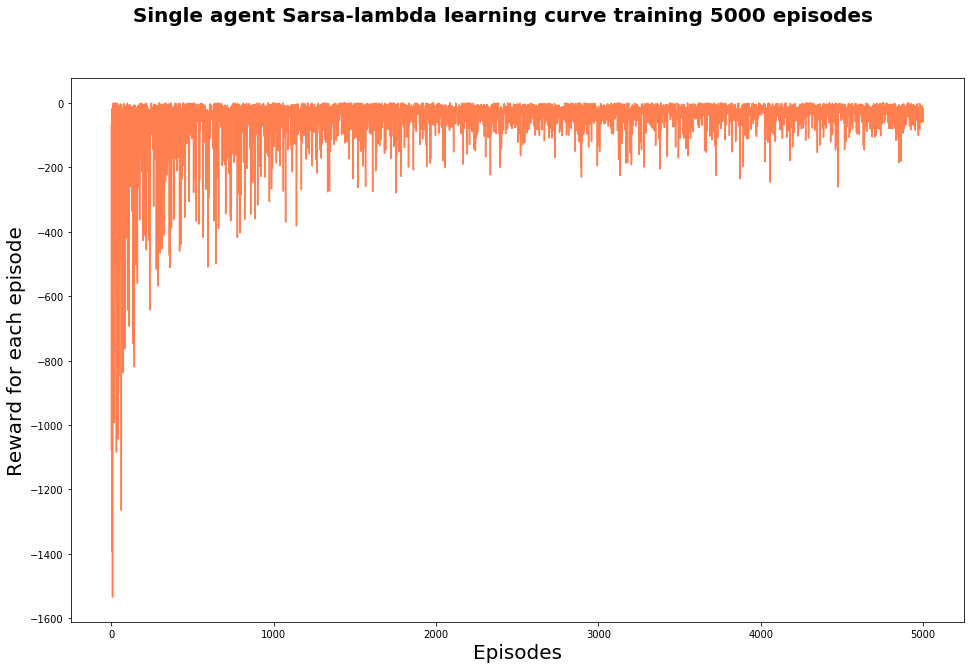

In [53]:
fig = plt.figure(figsize=(16, 10))
plt.plot(np.arange(episodes), play_1,'coral')
# plt.plot(np.arange(episodes), avg_reward,'violet')
plt.xlabel('Episodes',fontsize=20)
plt.ylabel('Reward for each episode',fontsize=20)
plt.suptitle('Single agent Sarsa-lambda learning curve training 5000 episodes', fontsize= 20, fontweight='bold')

plt.show()
fig.savefig('Sarsa-lambda learning curve.png')

Please make sure that all of your code is above this cell. Here, please insert your static learning curve and answer the verbal questions (describe your choice of parameters and results). 

YOUR ANSWER HERE

<img src="Average_learning_curve.png" style="width: 500px;"/>

At the first of 20-30 episodes, Sarsa lambda agent needs amount of steps to reach the target, maxmium steps is about 450, after that this agent learns quickly. After around 700 episodes, agent takes 40 steps on average reach the end point.Sarsa lambda agent can learn quickly in a short time and maintain a stable learning level. 
I choose greedy = 0.01 which can get a high probably chose action based on maximum q value.lambda = 0.9,this can maintain the current state can have a significant effect on the previous state. Discount factor parameter gamma = 1, which can make the next state q value can have a 100% influence on TD error. Choose learning rate alpha = 0.05(1 /m),where m is the number of tilings. which keep a high training effect.

##  Q lambda

In [25]:
def Q_action(position,velocity,valuefunction,probably):

    if probably >= 1 - greedy:
        values =[]
        for i in actions:
            values.append(valuefunction.get_value(position,velocity,i))
        return actions[np.argmax(values)]
    else:
        return np.random.choice(actions) 

In [26]:
def max_action(position,velocity,valuefunction):
    values =[]
    for i in actions:
        values.append(valuefunction.get_value(position,velocity,i))
    return actions[np.argmax(values)]

In [40]:
class q_lambda:
    def __init__(self, step, tilings = 15, maxsize =20000):
        self.hashtable = type_change(maxsize)
        self.numtilings = tilings
        self.weights = np.zeros(maxsize)
        self.eligibility = np.zeros(maxsize)
        self.offset_x = self.numtilings / (max_position - min_position)
        self.offset_y = self.numtilings / (max_velocity - min_velocity)
        self.stepsize = step / tilings
    def get_tiles(self,position,velocity,action):
        return tiling(self.hashtable,self.numtilings,[self.offset_x*position, self.offset_y*velocity],[action])
    
    def get_value(self,position, velocity,action):
        if position == max_position:
            return 0
        tiling = self.get_tiles(position, velocity, action)
        return np.sum(self.weights[tiling])
    
    def update_value(self, position,velocity, action, returns,probably):
        tiling = self.get_tiles(position, velocity, action)
        estimation = np.sum(self.weights[tiling])
        delta = self.stepsize * (returns - estimation)
        for i in tiling:
            self.weights[i] += delta
#             np.random.seed(7)
            if probably >= 1 - greedy:
                self.eligibility[i] *= gamma * lamb_da
            else:
                self.eligibility[i] = 0
            
    def add_eligibility(self, position,velocity,action):
        tiling = self.get_tiles(position, velocity, action)
        for i in tiling:
            self.eligibility += 1
            
    def get_cost(self, position,velocity):
        costs = []
        for i in actions:
            costs.append(self.get_value(position, velocity, i))
        return np.max(costs)

In [43]:
episodes = 5000

eligibility_valuefunction = q_lambda(alpha)
reward_sum = np.zeros(episodes)
for i in range(episodes):
    count = 0
    total_reward = 0
    probably = np.random.rand(1)    
    env.reset()
    position = env.position
    velocity = env.velocity
    action = Q_action(position, velocity, eligibility_valuefunction, probably)
    while True:
        count += 1
        eligibility_valuefunction.add_eligibility( position, velocity,action)
        reward = env.make_step(action)
        new_position = env.position
        new_velocity = env.velocity
        new_action = max_action(new_position, new_velocity, eligibility_valuefunction)

        returns = reward + gamma * eligibility_valuefunction.get_value( new_position, new_velocity, new_action )
        if position != max_position:
            eligibility_valuefunction.update_value( position, velocity, action, returns,probably )
        if new_position == max_position:
            break
        position = new_position
        velocity = new_velocity
        action = new_action
        total_reward += reward 
    reward_sum[i] = total_reward

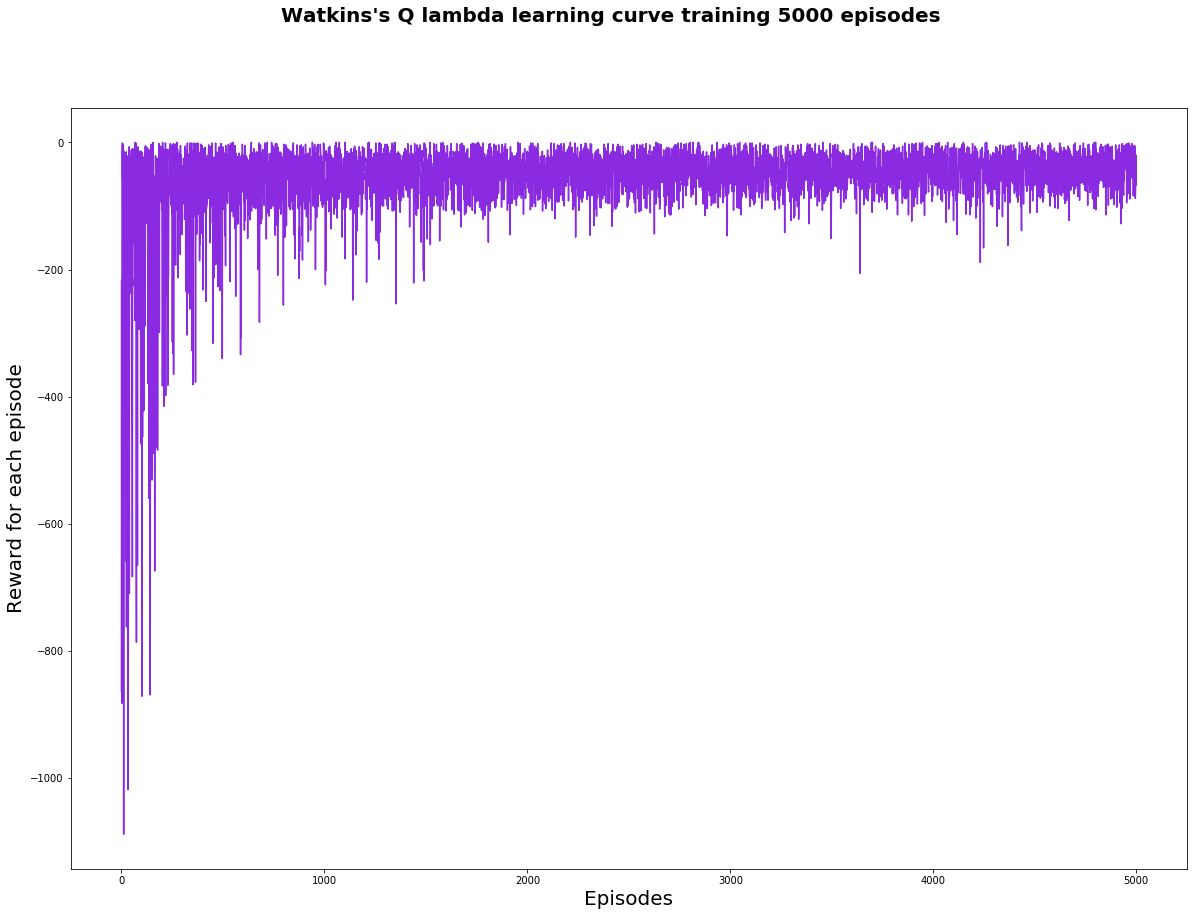

In [46]:
fig = plt.figure(figsize=(20, 14))
plt.plot(np.arange(episodes), reward_sum,'blueviolet')
plt.xlabel('Episodes',fontsize=20)
plt.ylabel('Reward for each episode',fontsize=20)
plt.suptitle("Watkins's Q lambda learning curve training 5000 episodes", fontsize= 20, fontweight='bold')

plt.show()
fig.savefig('Q_lambda_learning_curve.png')